# 구면적

In [5]:
import sys
import numpy as np
import pandas as pd
area = pd.read_csv('area.csv',sep=",", encoding = 'UTF-8')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [6]:
area.head()

,자치구,면적구성비
0,종로구,3.95
1,중구,1.65
2,용산구,3.61
3,성동구,2.79
4,광진구,2.82


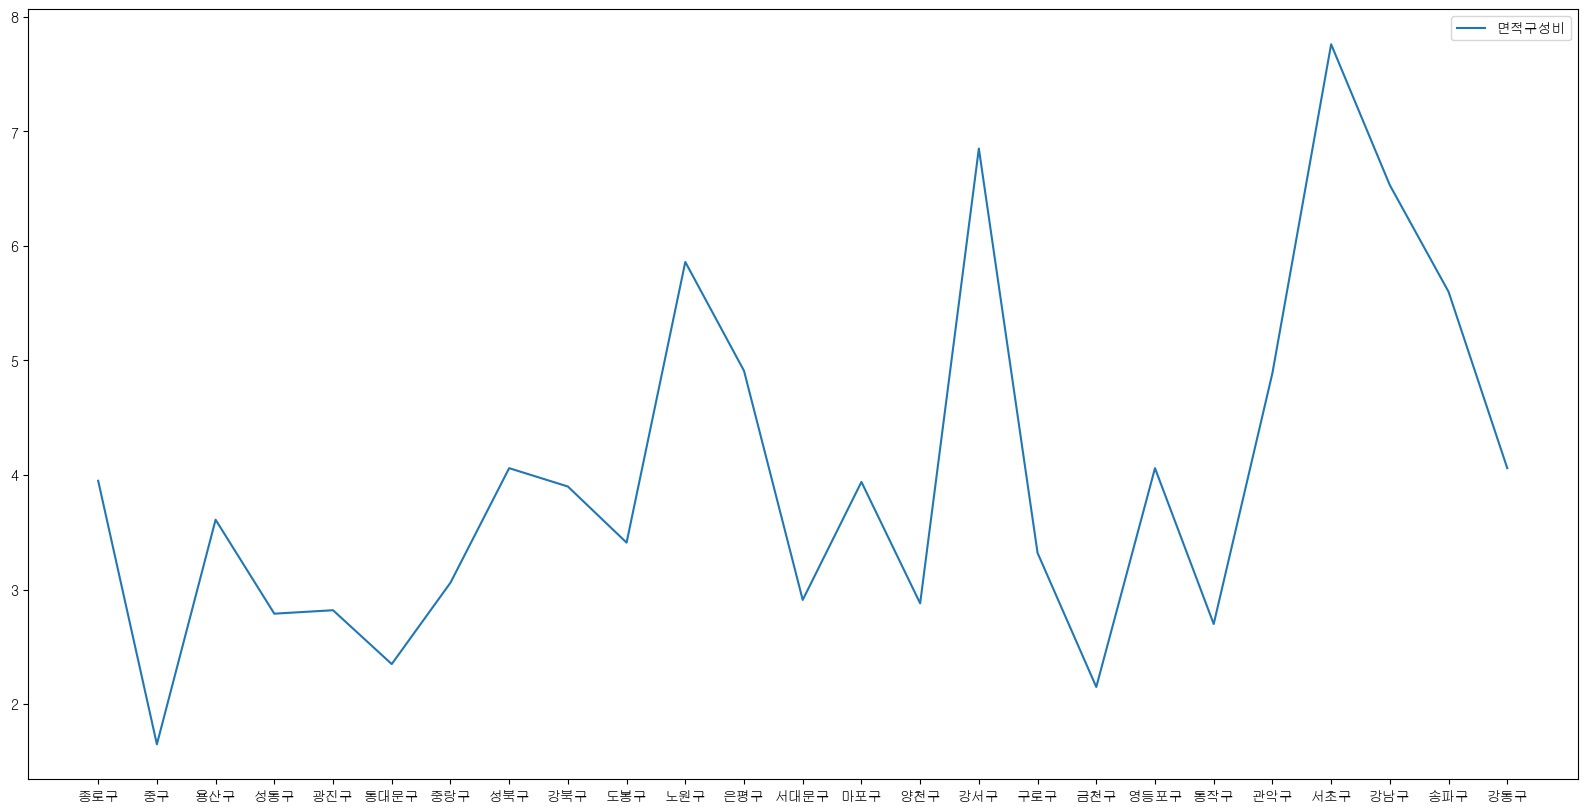

In [7]:
plt.figure(figsize=(20,10))
plt.plot('자치구','면적구성비',data=Income)
plt.legend()

In [8]:
standard = pd.DataFrame({'자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [9]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
df_area = pd.read_csv('area.csv',sep=",", encoding = 'UTF-8')

In [10]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')
df = pd.merge(df,df_area,how='inner', on='자치구')

In [11]:
df=df.set_index('자치구')

In [14]:
df.head()

,계,남자,여자,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합),면적구성비
자치구,,,,,,,,,,,,,,,
종로구,153684,74018,79666,28064,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.660701,19571837.56,3.95
중구,131450,63869,67581,24742,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.932366,19899691.04,1.65
용산구,236518,114571,121947,39461,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,37.373125,14894087.30,3.61
성동구,291609,141662,149947,46896,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,43.141640,17635698.46,2.79
광진구,353110,169525,183585,52604,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44,2.82


Text(0.5, 1.0, '상관관계')

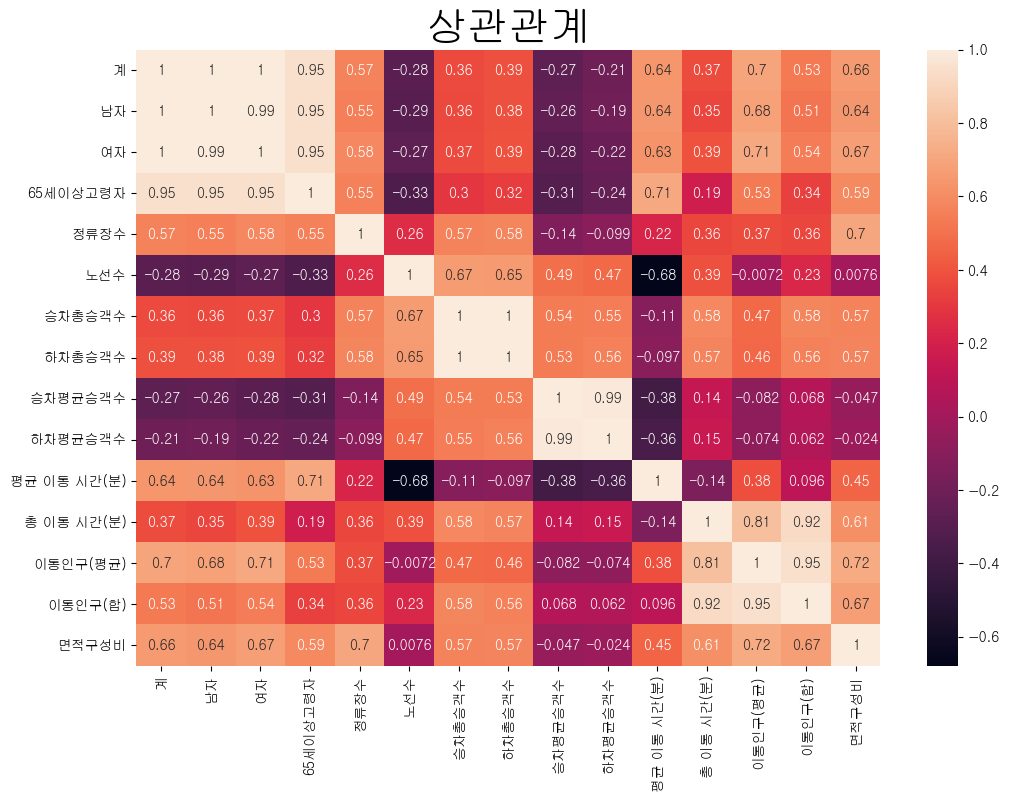

In [15]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

In [16]:
# 면적과 정류장 수는 양의 상관관계

### 가설1. 구 면적이 넓으면 정류장수도 많을 것이다?

In [18]:
import scipy.stats as stats
stats.pearsonr(df['정류장수'],df['면적구성비'])
# P < 0.05로 유의미, 상관관계 (+) 양의 상관관계.

PearsonRResult(statistic=0.7014067143823601, pvalue=9.367253507310065e-05)

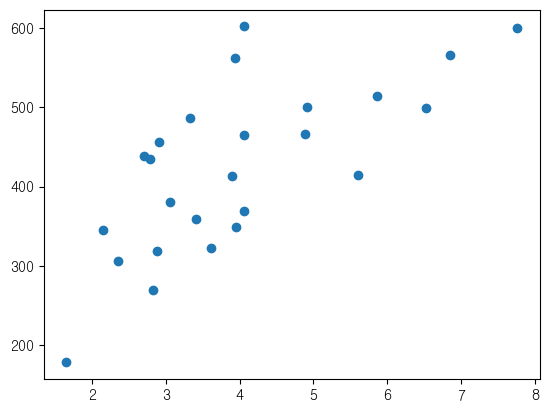

In [29]:
plt.scatter('면적구성비','정류장수',data=df)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
x= df['면적구성비'].values
y= df['정류장수'].values

In [24]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
lr.fit(x, y)

LinearRegression()

In [31]:
# 회귀계수가 48.44341717, 230.78757659로 결과가 나왔고,
# 두 변수의 관계를 회귀식으로 표현하면 정류장수 = 48.44341717 * 면적구성비 + 230.78757659이고, 
# 이는 정류장수 수치가 1증가할 때마다 면적구성비가 48.44341717만큼 증가한다.

print(lr.coef_[0])
print(lr.intercept_)

[48.44341717]
[230.78757659]


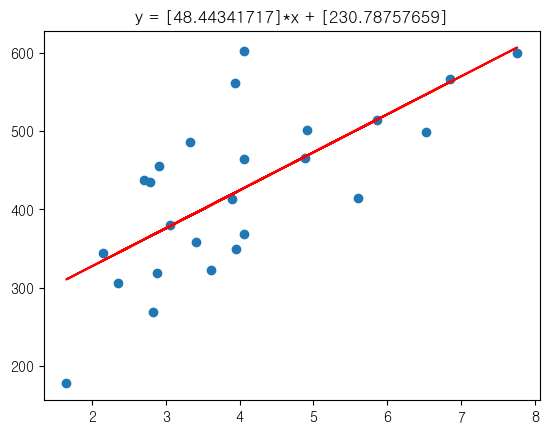

In [25]:
# scatter로 회귀식 그리기

import matplotlib.pyplot as plt
y2 = lr.coef_[0]*x + lr.intercept_
plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

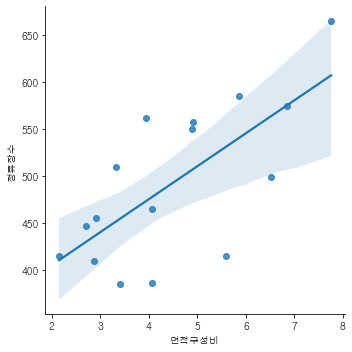

In [60]:
plt = sns.lmplot(x='면적구성비',y='정류장수', data=df)

In [37]:
# 회귀모형의 검정 및 적합도 파악
# A. F-statistic
# 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악

# B. P-Value
# 각 변수가 종속변수에 미치는 영향이 유의한지 파악

# C. 수정된 R제곱
# 회귀직선에 의하여 설명되는 변동이 총변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄
# 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인

import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     22.27
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           9.37e-05
Time:                        00:14:32   Log-Likelihood:                -143.15
No. Observations:                  25   AIC:                             290.3
Df Residuals:                      23   BIC:                             292.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.7876     43.886      5.259      0.000     140.002     321.573
x1            48.4434     10.265      4.719      0.000      27.209      69.678
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.042
Skew:                           0.481   Prob(JB):                        0.594
Kurtosis:                       2.729   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A. F-statistic의 p-value 값은 Prob(F-statistic)으로 표현되는데, 
이는 9.37e-05로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있습니다.
 
B. 중간쯤에 보면 coef와 변수 x1의 p-value 값이 나와있습니다. 
여기서 x1은 면적구성비이고 이 변수의 p-value가 	0.000로 표기 되어 있기에 0.05보다 작으므로 
target을 설명하는데 유의하다고 판단할 수 있습니다.
 
C. 제일 위 부분에 R-squared와 Adj. R-squared가 표기되어 있는데, 
값이 0.492정도로 이는50%만큼의 설명력을 가진다고 판단할 수 있습니다. 
참고로, 0에 가까울 수록 예측값을 믿을 수 없고 1에 가까울 수록 믿을 수 있다고 보면 됩니다.

In [32]:
# 실제 정류장수와 예측되는 정류장수의 차이를 비교한다.

difference = df['정류장수']-(lr.coef_[0] * df['면적구성비'] + lr.intercept_)

In [33]:
difference

자치구
종로구     -73.139074
중구     -132.719215
용산구     -82.668313
성동구      69.055290
광진구     -98.398013
동대문구    -38.629607
중랑구       0.975567
성북구     174.532150
강북구      -6.716904
도봉구     -36.979629
노원구      -0.666001
은평구      32.355245
서대문구     84.242079
마포구     140.345360
양천구     -51.304618
강서구       3.375016
구로구      94.380278
금천구      10.059076
영등포구     37.532150
동작구      76.415197
관악구      -1.675887
서초구      -6.708494
강남구     -48.123091
송파구     -87.070713
강동구     -58.467850
dtype: float64

In [34]:
differences = {'정류장수 차이': difference}
df_diff = pd.DataFrame(differences)
df_diff = df_diff.sort_values('정류장수 차이')
df_diff = df_diff.reset_index()
df_diff

,자치구,정류장수 차이
0,중구,-132.719215
1,광진구,-98.398013
2,송파구,-87.070713
3,용산구,-82.668313
4,종로구,-73.139074
5,강동구,-58.467850
6,양천구,-51.304618
7,강남구,-48.123091
8,동대문구,-38.629607
9,도봉구,-36.979629


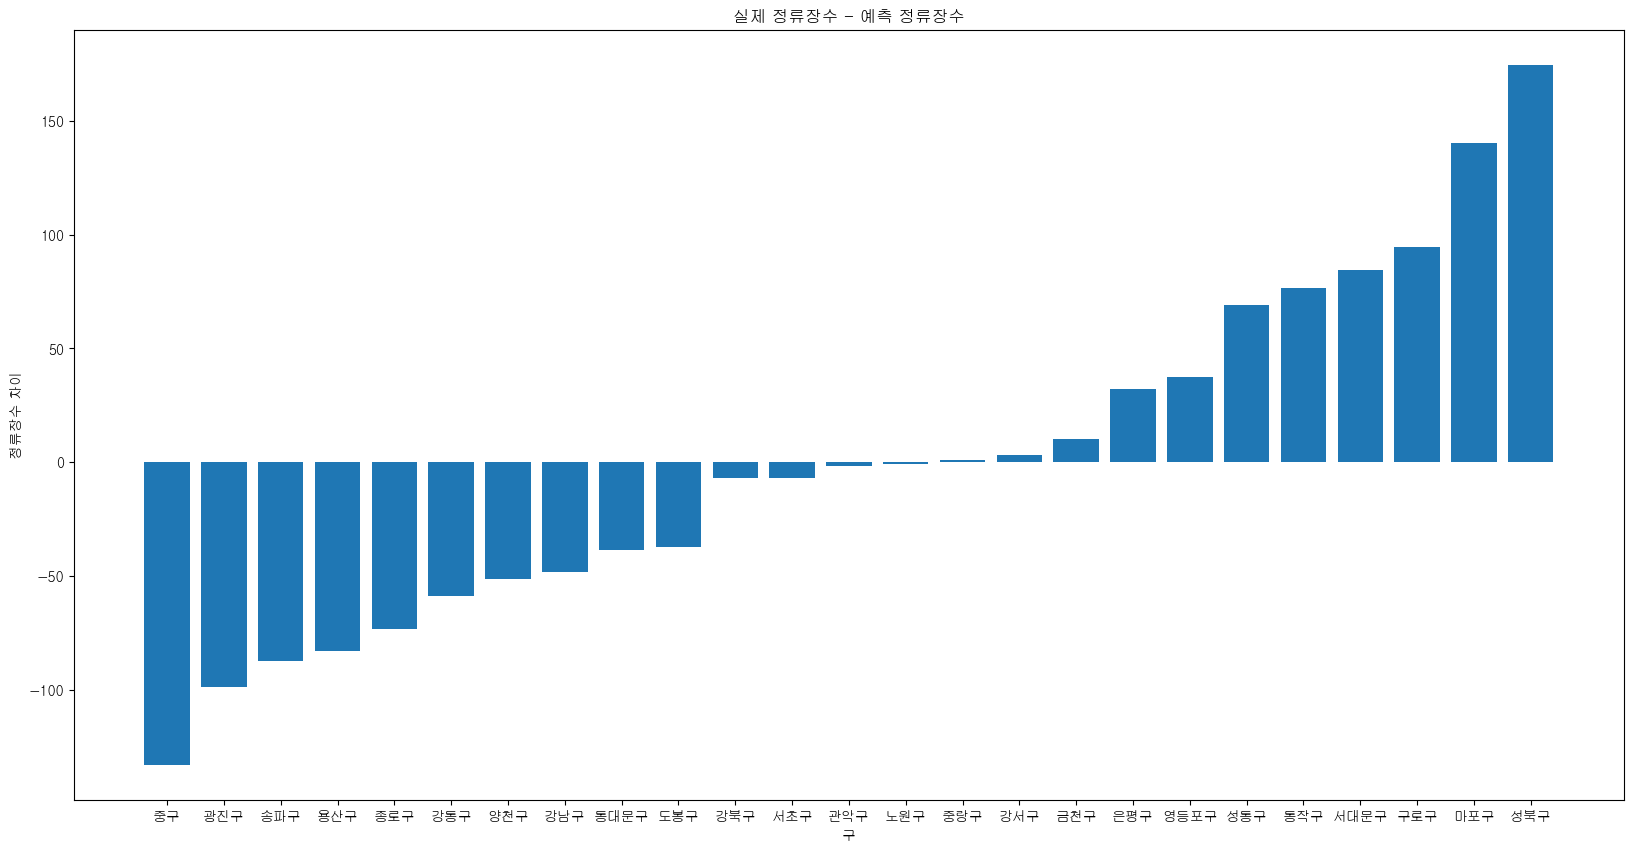

In [35]:
# 중구가 회귀식으로 구한 정류장수에 비해 실제 정류장수가 훨씬 적으므로, 중구에 추가적인 정류장이 필요하다.

plt.figure(figsize=(20,10))
plt.title('실제 정류장수 - 예측 정류장수')
plt.bar(df_diff['자치구'],df_diff['정류장수 차이'])
plt.xlabel('구')
plt.ylabel('정류장수 차이')

plt.show()